In [39]:
import pandas as pd
import matplotlib.pyplot as plt

[]

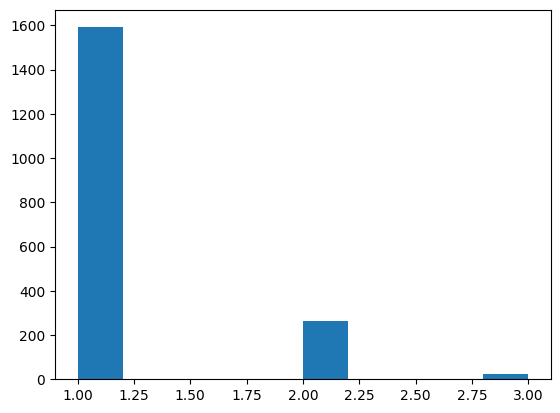

In [40]:
data = pd.read_csv("../data fusion/fusion.csv", sep=",")
plt.hist(data['Accident_Severity'])
plt.plot()

[]

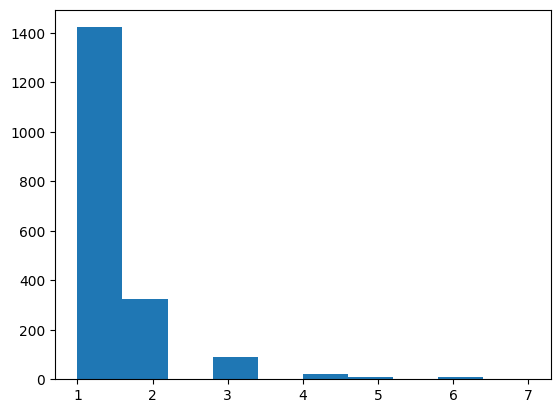

In [41]:
plt.hist(data['Number_of_Casualties'])
plt.plot()

[]

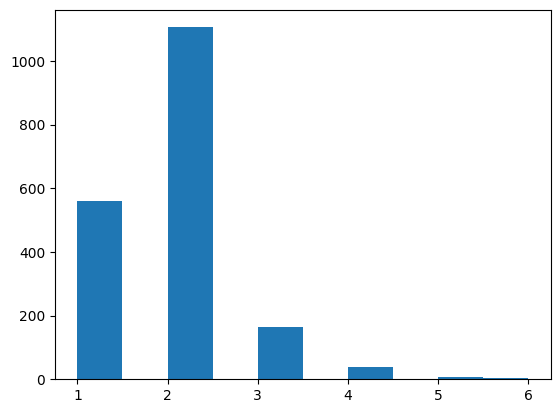

In [42]:
plt.hist(data['Number_of_Vehicles'])
plt.plot()

## Formatage des données pour analyse 

1) Remettre les variables telles qu'elles etaient: 
- Jours de la semaine
- Junction Control
- Junction Detail
- Road Type
- Vehicule Type
2) Les transformer en de multiples variables binaires
3) Calcul du VIF
- régression de Poisson sur la gravité de l'accident 
Peuvent potentiellement servir de test de robustesse:
- régression simple sur le nomnbre de victime 
- régression simple sur le nombre de véhicules 

-> qu'est ce qu'on cherche à démontrer? 
L'impact des conditions climatiques sur les accidents de voiture en Angleterre. 



In [43]:
road_data = pd.read_csv('../data formatage/Accident/Road Accident Data.csv')

update_columns = ['Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Road_Type', 'Vehicle_Type']

updated_df = data.merge(road_data[['Accident_Index'] + update_columns], 
                        on="Accident_Index", how="left", suffixes=('', '_new'))

for col in update_columns:
    updated_df[col] = updated_df[col + '_new'].combine_first(updated_df[col])

updated_df.drop(columns=[col + '_new' for col in update_columns], inplace=True)


In [44]:
len(updated_df)

1929

In [45]:
sum(updated_df['Junction_Control']=='Data missing or out of range')/len(updated_df)

0.3022291342664593

In [46]:
import numpy as np

updated_df['Junction_Control'] = updated_df['Junction_Control'].replace({
    'Data missing or out of range':np.nan 
}
)

In [47]:
updated_df['Junction_Detail'].unique()

array(['Not at junction or within 20 metres', 'Roundabout',
       'T or staggered junction', 'Crossroads', nan,
       'Private drive or entrance', 'More than 4 arms (not roundabout)',
       'Slip road', 'Other junction', 'Mini-roundabout'], dtype=object)

2) Traitement des variables en variables binaires

In [48]:
updated_df['Accident Date'] = pd.to_datetime(updated_df['Accident Date'])
updated_df['Year-Month'] = updated_df['Accident Date'].dt.to_period('M').astype(str)

# Encodage binaire (One-Hot Encoding)
binary_df = pd.get_dummies(updated_df['Year-Month'], drop_first=True)
binary_df = binary_df.replace({
  "True":1,
  "False":0 
})




In [49]:
updated_df = updated_df.combine_first(binary_df)


Traitement de la variable Time en plages horaires

In [50]:
import pandas as pd


updated_df['Time'] = pd.to_datetime(updated_df['Time'])

# Créer des catégories de tranches horaires
bins = [0, 6, 10, 15, 19, 24]  # Définition des tranches horaires
labels = ['Nuit', 'Matin', 'Midi', 'Après-midi', 'Soir']
updated_df['Time_Category'] = pd.cut(updated_df['Time'].dt.hour, bins=bins, labels=labels, include_lowest=True)


In [51]:
updated_df.drop(columns=['NaT','Latitude','Longitude','Year-Month','Time','Accident Date','Date','Accident_Index','Local_Authority_(District)', 'Police_Force'], inplace=True)

In [52]:
data_encoded = pd.get_dummies(updated_df, columns=['Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Road_Type', 'Vehicle_Type','Time_Category'], drop_first=True)

In [53]:
pd.set_option('display.max_columns', None)
data_encoded.head()

,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,Accident_Severity,DayLengthHours,Light_Conditions,MaxTemperature,MaxWindSpeed,MinTemperature,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,SolarRadiation,Speed_limit,TotalPrecipitation,Urban_or_Rural_Area,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Junction_Control_Auto traffic signal,Junction_Control_Give way or uncontrolled,Junction_Control_Not at junction or within 20 metres,Junction_Control_Stop sign,Junction_Detail_Mini-roundabout,Junction_Detail_More than 4 arms (not roundabout),Junction_Detail_Not at junction or within 20 metres,Junction_Detail_Other junction,Junction_Detail_Private drive or entrance,Junction_Detail_Roundabout,Junction_Detail_Slip road,Junction_Detail_T or staggered junction,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Vehicle_Type_Bus or coach (17 or more pass seats),Vehicle_Type_Car,Vehicle_Type_Goods 7.5 tonnes mgw and over,Vehicle_Type_Goods over 3.5t. and under 7.5t,Vehicle_Type_Minibus (8 - 16 passenger seats),Vehicle_Type_Motorcycle 125cc and under,Vehicle_Type_Motorcycle 50cc and under,Vehicle_Type_Motorcycle over 125cc and up to 500cc,Vehicle_Type_Motorcycle over 500cc,Vehicle_Type_Other vehicle,Vehicle_Type_Taxi/Private hire car,Vehicle_Type_Van / Goods 3.5 tonnes mgw or under,Time_Category_Matin,Time_Category_Midi,Time_Category_Après-midi,Time_Category_Soir
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,16.300000,2.0,19.9,23.6,12.4,1.0,1.0,1.0,29.64,30.0,0.0,1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,8.166667,1.0,8.2,16.0,0.8,1.0,2.0,2.0,0.74,40.0,11.6,1.0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3.0,16.033333,2.0,27.9,10.4,15.4,1.0,1.0,1.0,23.59,30.0,0.2,1.0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1.0,10.450000,0.0,4.6,36.1,2.0,1.0,3.0,1.0,7.06,30.0,4.6,1.0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,15.133333,2.0,12.3,18.4,2.2,2.0,2.0,1.0,20.51,30.0,0.1,1.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [54]:
print(data_encoded.isna().sum()[data_encoded.isna().sum() > 0])

Accident_Severity          51
DayLengthHours             51
Light_Conditions           51
MaxTemperature             51
MaxWindSpeed               51
MinTemperature             51
Number_of_Casualties       51
Number_of_Vehicles         51
Road_Surface_Conditions    51
SolarRadiation             51
Speed_limit                51
TotalPrecipitation         51
Urban_or_Rural_Area        51
dtype: int64


In [55]:
data_encoded = data_encoded.dropna()

In [56]:
data_encoded.describe()

,Accident_Severity,DayLengthHours,Light_Conditions,MaxTemperature,MaxWindSpeed,MinTemperature,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,SolarRadiation,Speed_limit,TotalPrecipitation,Urban_or_Rural_Area
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,1.166134,12.325985,1.666667,14.219702,21.799947,7.452929,1.354633,1.847710,1.420128,11.010000,39.558040,2.259478,0.630990
std,0.406504,3.119330,0.606892,6.168111,8.316257,5.273825,0.771017,0.710094,0.697632,7.626071,14.582325,4.099210,0.482665
min,1.000000,7.000000,0.000000,-2.200000,6.300000,-8.500000,1.000000,1.000000,1.000000,0.360000,20.000000,0.000000,0.000000
25%,1.000000,9.350000,1.000000,9.800000,15.800000,3.300000,1.000000,1.000000,1.000000,4.132500,30.000000,0.000000,0.000000
50%,1.000000,12.466667,2.000000,14.400000,20.600000,7.800000,1.000000,2.000000,1.000000,9.970000,30.000000,0.500000,1.000000
75%,1.000000,15.283333,2.000000,18.600000,26.600000,11.800000,1.000000,2.000000,2.000000,16.897500,50.000000,2.600000,1.000000
max,3.000000,17.933333,2.000000,37.500000,55.600000,19.900000,7.000000,6.000000,5.000000,29.830000,70.000000,35.200000,1.000000


Export des données traitées 

In [57]:
data_encoded.to_csv('Data_for_analysis.csv')